## Marching Squares

In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [71]:
def marching_squares_cv(func, canvas: np.ndarray, cell_width: int = 50, unit_length: float = 200, isovalue: float = 1, color: tuple = (140, 96, 191), thickness: int = 2) -> None:
    cell_width_in_units = cell_width / unit_length

    width = canvas.shape[1]//cell_width
    height = canvas.shape[0]//cell_width

    grid = np.zeros((width, height))
    
    # Dibujar líneas horizontales
    for i in range(height):
        y = i * cell_width     
        if i == height//2:
            cv.line(canvas, (0, y), (canvas.shape[1], y), (255, 255, 255), 1)  # lienzo, p_inicio, p_fin, color, grosor 
        else: 
            cv.line(canvas, (0, y), (canvas.shape[1], y), (85, 84, 94), 1)  # lienzo, p_inicio, p_fin, color, grosor 

    # Dibujar líneas verticales
    for i in range(width):
        x = i * cell_width
        if i == width//2:
            cv.line(canvas, (x, 0), (x, canvas.shape[0]), (255, 255, 255), 1)
        else:
            cv.line(canvas, (x, 0), (x, canvas.shape[0]), (85, 84, 94), 1) 

    for i in range(width):
        for j in range(height):
            grid[i][j] = func(cell_width_in_units * (i - width//2), - cell_width_in_units * (j - height//2))
            # width//2 y height//2 es para centrar la figura

    def linear_interpolation(a: float, b: float) -> float:
        return abs((isovalue - a)/(a - b))

    def draw(p1: tuple, p2: tuple):
        cv.line(canvas, (int(p1[0] * cell_width), int(p1[1] * cell_width)), (int(p2[0] * cell_width), int(p2[1] * cell_width)), color, thickness)

    for w in range(width - 1):
        for h in range(height - 1):
            cell = [0, 0, 0, 0]
            
            c0 = grid[w][h]
            c1 = grid[w + 1][h]
            c2 = grid[w + 1][h + 1]
            c3 = grid[w][h + 1]

            if c0 > isovalue: cell[0] = 1
            if c1 > isovalue: cell[1] = 1
            if c2 > isovalue: cell[2] = 1
            if c3 > isovalue: cell[3] = 1

            if cell == [0, 0, 0, 0]:
                pass
            elif cell == [0, 0, 0, 1]:
                    d1 = linear_interpolation(c3, c2)
                    d2 = linear_interpolation(c0, c3)
                    draw((w + d1, h + 1), (w, h + d2))
            elif cell == [0, 0, 1, 0]:
                    d1 = linear_interpolation(c3, c2)
                    d2 = linear_interpolation(c1, c2)
                    draw((w + d1, h + 1), (w + 1, h + d2))
            elif cell == [0, 0, 1, 1]:
                    d1 = linear_interpolation(c0, c3)
                    d2 = linear_interpolation(c1, c2)
                    draw((w, h + d1), (w + 1, h + d2))
            elif cell == [0, 1, 0, 0]:
                    d1 = linear_interpolation(c0, c1)
                    d2 = linear_interpolation(c1, c2)
                    draw((w + d1, h), (w + 1, h + d2))
            elif cell == [0, 1, 0, 1]:
                    d1 = linear_interpolation(c0, c1)
                    d2 = linear_interpolation(c1, c2)
                    d3 = linear_interpolation(c3, c2)
                    d4 = linear_interpolation(c0, c3)
                    draw((w, h + d4), (w + d1, h))
                    draw((w + d3, h + 1), (w + 1, h + d2))
            elif cell == [0, 1, 1, 0]:
                    d1 = linear_interpolation(c0, c1)
                    d2 = linear_interpolation(c3, c2)
                    draw((w + d1, h), (w + d2, h + 1))
            elif cell == [0, 1, 1, 1]:
                    d1 = linear_interpolation(c0, c1)
                    d2 = linear_interpolation(c0, c3)
                    draw((w, h + d2), (w + d1, h))
            elif cell == [1, 0, 0, 0]:
                    d1 = linear_interpolation(c0, c1)
                    d2 = linear_interpolation(c0, c3)
                    draw((w, h + d2), (w + d1, h))
            elif cell == [1, 0, 0, 1]:
                    d1 = linear_interpolation(c0, c1)
                    d2 = linear_interpolation(c3, c2)
                    draw((w + d1, h), (w + d2, h + 1))
            elif cell == [1, 0, 1, 0]:
                    d1 = linear_interpolation(c0, c1)
                    d2 = linear_interpolation(c1, c2)
                    d3 = linear_interpolation(c3, c2)
                    d4 = linear_interpolation(c0, c3)
                    draw((w + d1, h), (w + 1, h + d2))
                    draw((w, h + d4), (w + d3, h + 1))
            elif cell == [1, 0, 1, 1]:
                    d1 = linear_interpolation(c0, c1)
                    d2 = linear_interpolation(c1, c2)
                    draw((w + d1, h), (w + 1, h + d2))
            elif cell == [1, 1, 0, 0]:
                    d1 = linear_interpolation(c0, c3)
                    d2 = linear_interpolation(c1, c2)
                    draw((w, h + d1), (w + 1, h + d2))
            elif cell == [1, 1, 0, 1]:
                    d1 = linear_interpolation(c1, c2)
                    d2 = linear_interpolation(c3, c2)
                    draw((w + d2, h + 1), (w + 1, h + d1))
            elif cell == [1, 1, 1, 0]:
                    d1 = linear_interpolation(c0, c3)
                    d2 = linear_interpolation(c3, c2)
                    draw((w, h + d1), (w + d2, h + 1))
            elif cell == [1, 1, 1, 1]:
                    pass

## MTLIB

In [58]:
def marching_squares(func, canvas_size: tuple, cell_width: int = 10, unit_length: float = 100, isovalue: float = 1, color: tuple = (140, 96, 191), thickness: int = 2) -> None:
    cell_width_in_units = cell_width / unit_length

    width = canvas_size[0]//cell_width
    height = canvas_size[1]//cell_width

    grid = np.zeros((width, height))
    
    for i in range(width):
        for j in range(height):
            grid[i][j] = func(cell_width_in_units * (i - width//2), - cell_width_in_units * (j - height//2))
            # width//2 y height//2 es para centrar la figura

    def linear_interpolation(a: float, b: float) -> float:
        return abs((isovalue - a)/(a - b))

    def draw(p1: tuple, p2: tuple):
        plt.plot([p1[0], p2[0]], [p1[1], p2[1]], color='b', linewidth=1)
        
    for w in range(width - 1):
        for h in range(height - 1):
            cell = [0, 0, 0, 0]
            
            c0 = grid[w][h]
            c1 = grid[w + 1][h]
            c2 = grid[w + 1][h + 1]
            c3 = grid[w][h + 1]

            if c0 > isovalue: cell[0] = 1
            if c1 > isovalue: cell[1] = 1
            if c2 > isovalue: cell[2] = 1
            if c3 > isovalue: cell[3] = 1


            if cell == [0, 0, 0, 0]:
                pass
            elif cell == [0, 0, 0, 1]:
                    d1 = linear_interpolation(c3, c2)
                    d2 = linear_interpolation(c0, c3)
                    draw((w + d1, h + 1), (w, h + d2))
            elif cell == [0, 0, 1, 0]:
                    d1 = linear_interpolation(c3, c2)
                    d2 = linear_interpolation(c1, c2)
                    draw((w + d1, h + 1), (w + 1, h + d2))
            elif cell == [0, 0, 1, 1]:
                    d1 = linear_interpolation(c0, c3)
                    d2 = linear_interpolation(c1, c2)
                    draw((w, h + d1), (w + 1, h + d2))
            elif cell == [0, 1, 0, 0]:
                    d1 = linear_interpolation(c0, c1)
                    d2 = linear_interpolation(c1, c2)
                    draw((w + d1, h), (w + 1, h + d2))
            elif cell == [0, 1, 0, 1]:
                    d1 = linear_interpolation(c0, c1)
                    d2 = linear_interpolation(c1, c2)
                    d3 = linear_interpolation(c3, c2)
                    d4 = linear_interpolation(c0, c3)
                    draw((w, h + d4), (w + d1, h))
                    draw((w + d3, h + 1), (w + 1, h + d2))
            elif cell == [0, 1, 1, 0]:
                    d1 = linear_interpolation(c0, c1)
                    d2 = linear_interpolation(c3, c2)
                    draw((w + d1, h), (w + d2, h + 1))
            elif cell == [0, 1, 1, 1]:
                    d1 = linear_interpolation(c0, c1)
                    d2 = linear_interpolation(c0, c3)
                    draw((w, h + d2), (w + d1, h))
            elif cell == [1, 0, 0, 0]:
                    d1 = linear_interpolation(c0, c1)
                    d2 = linear_interpolation(c0, c3)
                    draw((w, h + d2), (w + d1, h))
            elif cell == [1, 0, 0, 1]:
                    d1 = linear_interpolation(c0, c1)
                    d2 = linear_interpolation(c3, c2)
                    draw((w + d1, h), (w + d2, h + 1))
            elif cell == [1, 0, 1, 0]:
                    d1 = linear_interpolation(c0, c1)
                    d2 = linear_interpolation(c1, c2)
                    d3 = linear_interpolation(c3, c2)
                    d4 = linear_interpolation(c0, c3)
                    draw((w + d1, h), (w + 1, h + d2))
                    draw((w, h + d4), (w + d3, h + 1))
            elif cell == [1, 0, 1, 1]:
                    d1 = linear_interpolation(c0, c1)
                    d2 = linear_interpolation(c1, c2)
                    draw((w + d1, h), (w + 1, h + d2))
            elif cell == [1, 1, 0, 0]:
                    d1 = linear_interpolation(c0, c3)
                    d2 = linear_interpolation(c1, c2)
                    draw((w, h + d1), (w + 1, h + d2))
            elif cell == [1, 1, 0, 1]:
                    d1 = linear_interpolation(c1, c2)
                    d2 = linear_interpolation(c3, c2)
                    draw((w + d2, h + 1), (w + 1, h + d1))
            elif cell == [1, 1, 1, 0]:
                    d1 = linear_interpolation(c0, c3)
                    d2 = linear_interpolation(c3, c2)
                    draw((w, h + d1), (w + d2, h + 1))
            elif cell == [1, 1, 1, 1]:
                    pass

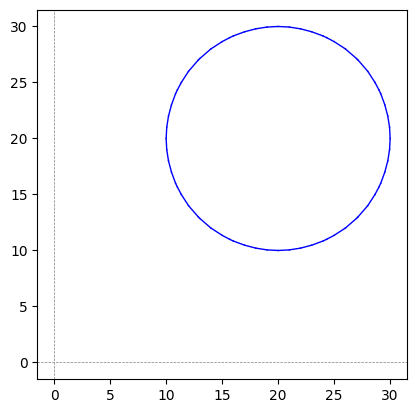

In [59]:
# Ejemplo de uso:
def example_func(x, y):
    return x**2 + y**2  # Debes reemplazar esto con tu función deseada

canvas_size = (400, 400)  # Tamaño del lienzo
plt.gca().set_aspect('equal', adjustable='box')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)

marching_squares(example_func, canvas_size)

In [61]:
blank = np.zeros((500, 1000, 3), dtype='uint8')

# Color del fondo
blank[:] = (10, 10, 10)

marching_squares_cv(lambda x, y: x**2/4 + y**2/0.9, blank)

# Titulo de la ventana
cv.imshow('Ellipse - marching squares example 2', blank)

cv.waitKey(0)

-1

In [79]:
blank = np.zeros((500, 500, 3), dtype='uint8')

# Color del fondo
blank[:] = (10, 10, 10)

marching_squares_cv(lambda x, y: np.sqrt(x**2 + y**2), blank, 70)

cv.imshow('Circle - marching squares example 1', blank)

cv.waitKey(0)

-1

In [80]:
import cv2
import numpy as np

# Definir el tamaño de la imagen
width, height = 800, 600

# Crear una imagen en blanco
imagen = np.zeros((height, width, 3), dtype=np.uint8)

# Calcular el centro de la imagen
centro = (width // 2, height // 2)

# Definir el radio de la esfera
radio = 100

# Definir el color (en formato BGR, rojo en este caso)
color = (0, 0, 255)

# Grosor de línea
grosor_linea = 2

# Dibujar la esfera en la imagen
cv2.circle(imagen, centro, radio, color, grosor_linea)

# Mostrar la imagen en una ventana
cv2.imshow('Esfera en OpenCV', imagen)

# Esperar hasta que se presione una tecla y luego cerrar la ventana
cv2.waitKey(0)
cv2.destroyAllWindows()
